# Group 17: Final Project

# Pre

In [1]:
# prepare the start

In [1]:
%load_ext sql

In [3]:
!dropdb -U student group17_final

In [4]:
!createdb -U student group17_final

In [2]:
%sql postgresql://student@/group17_final

'Connected: student@group17_final'

In [76]:
from IPython.display import Image

# Question 1: Data Description

In [6]:
#get the data and using csvcuts to get some information about this dataset and move it to some directory.

In [7]:
!wget https://s3.amazonaws.com/gwu.workshop.guiqi-2019/NYC_Restaurant_Inspection_1_1.csv

--2019-11-30 03:12:04--  https://s3.amazonaws.com/gwu.workshop.guiqi-2019/NYC_Restaurant_Inspection_1_1.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.99.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.99.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196530753 (187M) [text/csv]
Saving to: ‘NYC_Restaurant_Inspection_1_1.csv’

NYC_Restaurant_Insp 100%[===================>] 187.43M  48.8MB/s    in 4.0s    

2019-11-30 03:12:08 (46.5 MB/s) - ‘NYC_Restaurant_Inspection_1_1.csv’ saved [196530753/196530753]



In [8]:
!cp NYC_Restaurant_Inspection_1_1.csv /tmp/NYC_Restaurant_Inspection_1_1.csv

In [9]:
!wc -l NYC_Restaurant_Inspection_1_1.csv

397025 NYC_Restaurant_Inspection_1_1.csv


In [10]:
!csvcut -n NYC_Restaurant_Inspection_1_1.csv

  1: ID
  2: NAME
  3: DISTRICT
  4: BUILDING
  5: STREET
  6: ZIPCODE
  7: PHONE
  8: CUISINE_DESCRIPTION
  9: INSPECTION_DATE
 10: INSPECTION_MONTH
 11: INSPECTION_DAY
 12: INSPECTION_YEAR
 13: INSPECTION_DAY_OF_WEEK
 14: ACTION
 15: VIOLATION_CODE
 16: VIOLATION_DESCRIPTION
 17: CRITICAL_FLAG
 18: SCORE
 19: GRADE
 20: GRADE_DATE
 21: GRADE_MONTH
 22: GRADE_DAY
 23: GRADE_YEAR
 24: GRADE_DAY_OF_WEEK
 25: INSPECTION_TYPE1
 26: INSPECTION_TYPE2
 27: Latitude
 28: Longitude
 29: LAT_LONG


In [11]:
# using csvstat to get this dataset's basic information on 3700 rows

In [12]:
!head -n 3700 NYC_Restaurant_Inspection_1_1.csv |csvstat

  1. "ID"

	Type of data:          Number
	Contains null values:  False
	Unique values:         3348
	Smallest value:        30,112,340
	Largest value:         50,101,105
	Sum:                   170,509,938,138
	Mean:                  46,096,225.504
	Median:                50,005,729
	StDev:                 4,418,794.404
	Most common values:    50,019,198 (4x)
	                       41,703,394 (3x)
	                       50,008,729 (3x)
	                       50,037,940 (3x)
	                       41,387,224 (3x)

  2. "NAME"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         3061
	Longest value:         61 characters
	Most common values:    DUNKIN' (33x)
	                       STARBUCKS (27x)
	                       SUBWAY (27x)
	                       MCDONALD'S (15x)
	                       KENNEDY FRIED CHICKEN (12x)

  3. "DISTRICT"

	Type of data:          Text
	Contains null values:  False
	Unique values:         

# Question 2 :Data Wrangling

### We use Trifacata to do some data wrangling. The receipts are as follows:

```
rename type: manual mapping: [CAMIS,'ID']
rename type: manual mapping: [DBA,'NAME']
rename type: manual mapping: [BORO,'DISTRICT']
drop col: BIN action: Drop
drop col: {Council District} action: Drop
drop col: {Community Board} action: Drop
drop col: BBL action: Drop
drop col: {RECORD DATE} action: Drop
drop col: {Census Tract} action: Drop
drop col: NTA action: Drop
derive type: single value: dateformat({INSPECTION DATE}, 'EEE, MM\/dd\/yyyy HH:mm:ss.SSS') as: 'dateformat_INSPECTION DATE'
replacepatterns col: {dateformat_INSPECTION DATE} with: '' on: ` 00:00:00.000` global: true
extractpatterns type: custom col: {dateformat_INSPECTION DATE} on: `{dayofweek-abbrev}`
splitpatterns col: {dateformat_INSPECTION DATE} type: on on: '\/' limit: 2
extractpatterns type: custom col: {dateformat_INSPECTION DATE2} on: `{digit}{2}`
drop col: {dateformat_INSPECTION DATE2} action: Drop
rename type: manual mapping: [{dateformat_INSPECTION DATE5},'INSPECTION MONTH']
settype col: {INSPECTION MONTH} type: Integer
rename type: manual mapping: [{dateformat_INSPECTION DATE3},'INSPECTION DAY']
settype col: {dateformat_INSPECTION DATE4} type: Integer
rename type: manual mapping: [{dateformat_INSPECTION DATE4},'INSPECTION YEAR']
rename type: manual mapping: [{dateformat_INSPECTION DATE1},'INSPECTION DAY OF WEEK']
derive type: single value: dateformat({GRADE DATE}, 'EEE, MM\/dd\/yyyy HH:mm:ss.SSS') as: 'dateformat_GRADE DATE'
replacepatterns col: {dateformat_GRADE DATE} with: '' on: ` 00:00:00.000` global: true
splitpatterns col: {dateformat_GRADE DATE} type: on on: '\/' limit: 2
extractpatterns type: custom col: {dateformat_GRADE DATE1} on: `{alpha}{3}, `
extractpatterns type: custom col: {dateformat_GRADE DATE1} on: `{digit}{2}`
move col: {dateformat_GRADE DATE4} position: after after: {dateformat_GRADE DATE3}
drop col: {dateformat_GRADE DATE1} action: Drop
rename type: manual mapping: [{dateformat_GRADE DATE5},'GRADE MONTH']
rename type: manual mapping: [{dateformat_GRADE DATE2},'GRADE DAY']
rename type: manual mapping: [{dateformat_GRADE DATE3},'GRADE YEAR']
rename type: manual mapping: [{dateformat_GRADE DATE4},'GRADE DAY OF WEEK']
settype col: {GRADE MONTH} type: Integer
settype col: {GRADE YEAR} type: Integer
rename type: manual mapping: [{CUISINE DESCRIPTION},'CUISINE_DESCRIPTION']
rename type: manual mapping: [{INSPECTION DATE},'INSPECTION_DATE']
rename type: manual mapping: [{INSPECTION MONTH},'INSPECTION_MONTH']
rename type: manual mapping: [{INSPECTION DAY},'INSPECTION_DAY']
rename type: manual mapping: [{INSPECTION YEAR},'INSPECTION_YEAR']
rename type: manual mapping: [{INSPECTION DAY OF WEEK},'INSPECTION_DAY_OF_WEEK']
rename type: manual mapping: [{VIOLATION CODE},'VIOLATION_CODE']
rename type: manual mapping: [{VIOLATION DESCRIPTION},'VIOLATION_DESCRIPTION']
rename type: manual mapping: [{CRITICAL FLAG},'CRITICAL_FLAG']
rename type: manual mapping: [{GRADE DATE},'GRADE_DATE']
rename type: manual mapping: [{GRADE MONTH},'GRADE_MONTH']
rename type: manual mapping: [{GRADE DAY},'GRADE_DAY']
rename type: manual mapping: [{GRADE YEAR},'GRADE_YEAR']
rename type: manual mapping: [{GRADE DAY OF WEEK},'GRADE_DAY_OF_WEEK']
rename type: manual mapping: [{INSPECTION TYPE},'INSPECTION_TYPE']
```

## Create tables

In [23]:
%%sql
DROP TABLE IF EXISTS NYC_INSPECT;

CREATE TABLE NYC_INSPECT(
   ID INTEGER NOT NULL,
   NAME VARCHAR(100),
   DISTRICT VARCHAR(100),
   BUILDING VARCHAR(100),
   STREET VARCHAR(100),
   ZIPCODE VARCHAR(100),
   PHONE VARCHAR(100),
   CUISINE_DESCRIPTION VARCHAR(100),
   INSPECTION_DATE VARCHAR(100),
   INSPECTION_MONTH VARCHAR(100),
   INSPECTION_DAY VARCHAR(100),
   INSPECTION_YEAR VARCHAR(100),
   INSPECTION_DAY_OF_WEEK VARCHAR(5),
   ACTION VARCHAR(300),
   VIOLATION_CODE VARCHAR(200),
   VIOLATION_DESCRIPTION VARCHAR(400),
   CRITICAL_FLAG VARCHAR(100),
   SCORE varchar(20),
   GRADE CHAR(2),
   GRADE_DATE VARCHAR(100),
   GRADE_MONTH VARCHAR(100),
   GRADE_DAY VARCHAR(100),
   GRADE_YEAR VARCHAR(100),
   GRADE_DAY_OF_WEEK VARCHAR(5),
   INSPECTION_TYPE1 VARCHAR(100),
   INSPECTION_TYPE2 VARCHAR(100),
   LATITUDE VARCHAR(100),
   LONGITUDE VARCHAR(100),
   LAT_LONG VARCHAR(400)
);

 * postgresql://student@/group17_final
Done.
Done.


[]

In [24]:
%%sql
COPY NYC_INSPECT FROM '/tmp/NYC_Restaurant_Inspection_1_1.csv'
CSV
HEADER;

 * postgresql://student@/group17_final
397024 rows affected.


[]

In [25]:
%%sql
ALTER TABLE nyc_inspect ALTER COLUMN SCORE TYPE NUMERIC(5,2) USING (NULLIF(trim(SCORE),'')::numeric)

 * postgresql://student@/group17_final
Done.


[]

## Create star schema

In [80]:
from IPython.display import Image

In [81]:
Image(url="https://github.com/lingx26/lingx26/blob/master/17.jpg?raw=true")

## create information table

In [28]:
%%sql
DROP TABLE IF EXISTS INFO;

CREATE TABLE INFO(
 key SERIAL PRIMARY KEY,
 ID INTEGER,
 NAME VARCHAR(200),
 PHONE VARCHAR(400)
);

 * postgresql://student@/group17_final
Done.
Done.


[]

In [29]:
%%sql
INSERT INTO INFO(ID,NAME,PHONE)
SELECT DISTINCT ID,NAME,PHONE
from nyc_inspect;

 * postgresql://student@/group17_final
27174 rows affected.


[]

In [30]:
%%sql
ALTER TABLE nyc_inspect
ADD COLUMN information_key INTEGER,
ADD CONSTRAINT fk_info
    FOREIGN KEY (information_key)
    REFERENCES INFO(key);

 * postgresql://student@/group17_final
Done.


[]

In [31]:
%%sql 
UPDATE nyc_inspect
SET INFORMATION_KEY = INFO.KEY
from INFO
WHERE INFO.ID = nyc_inspect.ID

 * postgresql://student@/group17_final
397024 rows affected.


[]

## create date table

In [33]:
%%sql
DROP TABLE IF EXISTS DATE;

CREATE TABLE DATE(
  key SERIAL PRIMARY KEY,
  DATE VARCHAR(50),
  MONTH VARCHAR(50),
  DAY VARCHAR(50),
  YEAR VARCHAR(50),
  DAY_OF_WEEK VARCHAR(50)
);

 * postgresql://student@/group17_final
Done.
Done.


[]

In [34]:
%%sql
INSERT INTO DATE(DATE,MONTH,DAY,YEAR,DAY_OF_WEEK)
SELECT distinct INSPECTION_DATE AS date,
   INSPECTION_MONTH AS MONTH,
   INSPECTION_DAY AS DAY,
   INSPECTION_YEAR AS YEAR,
   INSPECTION_DAY_OF_WEEK AS DAY_OF_WEEK
from nyc_inspect
union
SELECT distinct GRADE_DATE AS date,
   GRADE_MONTH AS MONTH,
   GRADE_DAY AS DAY,
   GRADE_YEAR AS YEAR,
   GRADE_DAY_OF_WEEK AS DAY_OF_WEEK
from nyc_inspect;

 * postgresql://student@/group17_final
1314 rows affected.


[]

In [35]:
%%sql
ALTER TABLE nyc_inspect
ADD COLUMN inspection_date_key INTEGER,
ADD CONSTRAINT fk_inspection_date
    FOREIGN KEY (inspection_date_key)
    REFERENCES DATE(key);

 * postgresql://student@/group17_final
Done.


[]

In [36]:
%%sql 
UPDATE nyc_inspect
SET inspection_date_key = DATE.KEY
from date
WHERE DATE.DATE = NYC_INSPECT.INSPECTION_DATE

 * postgresql://student@/group17_final
397024 rows affected.


[]

In [37]:
%%sql
ALTER TABLE nyc_inspect
ADD COLUMN GRADE_DATE_key INTEGER,
ADD CONSTRAINT fk_GRADE_DATE
    FOREIGN KEY (GRADE_DATE_key)
    REFERENCES DATE(key);

 * postgresql://student@/group17_final
Done.


[]

In [38]:
%%sql 
UPDATE nyc_inspect
SET GRADE_DATE_key = DATE.KEY
from date
WHERE DATE.DATE = NYC_INSPECT.GRADE_DATE

 * postgresql://student@/group17_final
397024 rows affected.


[]

## create cuisine table

In [40]:
%%sql
DROP TABLE IF EXISTS CUISINE;

CREATE TABLE CUISINE(
  key SERIAL PRIMARY KEY,
  CUISINE_DESCRIPTION VARCHAR(200)
);

 * postgresql://student@/group17_final
Done.
Done.


[]

In [41]:
%%sql
INSERT INTO CUISINE(CUISINE_DESCRIPTION)
select distinct CUISINE_DESCRIPTION
from nyc_inspect;

 * postgresql://student@/group17_final
84 rows affected.


[]

In [42]:
%%sql
ALTER TABLE nyc_inspect
ADD COLUMN CUISINE_KEY INTEGER,
ADD CONSTRAINT fk_CUISINE
    FOREIGN KEY (CUISINE_KEY)
    REFERENCES CUISINE(key);

 * postgresql://student@/group17_final
Done.


[]

In [43]:
%%sql
update nyc_inspect
set CUISINE_KEY = CUISINE.KEY
from CUISINE
where nyc_inspect.CUISINE_DESCRIPTION = CUISINE.CUISINE_DESCRIPTION

 * postgresql://student@/group17_final
397024 rows affected.


[]

In [44]:
#create inspection table

In [45]:
%%sql
DROP TABLE IF EXISTS INSPECTION CASCADE;

CREATE TABLE INSPECTION(
  key SERIAL PRIMARY KEY,
  inspection_type1 varchar(100),
  inspection_type2 varchar(100)  
);

 * postgresql://student@/group17_final
Done.
Done.


[]

In [46]:
%%sql
INSERT INTO inspection (inspection_type1,inspection_type2)
select distinct inspection_type1,inspection_type2
from nyc_inspect;

 * postgresql://student@/group17_final
33 rows affected.


[]

In [47]:
%%sql
ALTER TABLE nyc_inspect
ADD COLUMN inspection_type_key INTEGER,
ADD CONSTRAINT fk_INSPECTION
    FOREIGN KEY (inspection_type_key)
    REFERENCES INSPECTION (key);

 * postgresql://student@/group17_final
Done.


[]

In [48]:
%%sql
UPDATE nyc_inspect
SET inspection_type_key = inspection.key
from inspection
where nyc_inspect.inspection_type1 = inspection.inspection_type1 and
nyc_inspect.inspection_type2 = inspection.inspection_type2

 * postgresql://student@/group17_final
397024 rows affected.


[]

## create violation table

In [50]:
%%sql
DROP TABLE IF EXISTS VIOLATION;

CREATE TABLE VIOLATION(
 key SERIAL PRIMARY KEY,
 VIOLATION_CODE VARCHAR(200),
 VIOLATION_DESCRIPTION VARCHAR(400),
 CRITICAL_FLAG VARCHAR(100),
 ACTION VARCHAR(300)
);

 * postgresql://student@/group17_final
Done.
Done.


[]

In [51]:
%%sql
INSERT INTO VIOLATION(VIOLATION_CODE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,ACTION)
SELECT DISTINCT VIOLATION_CODE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,ACTION
from nyc_inspect;

 * postgresql://student@/group17_final
290 rows affected.


[]

In [52]:
%%sql
ALTER TABLE nyc_inspect
ADD COLUMN violation_key INTEGER,
ADD CONSTRAINT fk_violation
    FOREIGN KEY (violation_key)
    REFERENCES VIOLATION(key);

 * postgresql://student@/group17_final
Done.


[]

In [53]:
%%sql
update nyc_inspect
set VIOLATION_KEY = VIOLATION.KEY
from VIOLATION
where nyc_inspect.VIOLATION_DESCRIPTION = VIOLATION.VIOLATION_DESCRIPTION

 * postgresql://student@/group17_final
397024 rows affected.


[]

## create location table

In [55]:
%%sql
DROP TABLE IF EXISTS Location;

CREATE TABLE Location(
 key SERIAL   PRIMARY KEY,
 DISTRICT     VARCHAR(20),
 BUILDING     VARCHAR(50),
 STREET       VARCHAR(100),
 ZIPCODE      VARCHAR(100),
 LATITUDE     VARCHAR(100),
 LONGITUDE    VARCHAR(100),
 LAT_LONG     VARCHAR(100)
);

 * postgresql://student@/group17_final
Done.
Done.


[]

In [56]:
%%sql
INSERT INTO Location(DISTRICT,BUILDING,STREET,ZIPCODE,LATITUDE,LONGITUDE,LAT_LONG)
SELECT DISTINCT DISTRICT,BUILDING,STREET,ZIPCODE,LATITUDE,LONGITUDE,LAT_LONG
from nyc_inspect;

 * postgresql://student@/group17_final
24117 rows affected.


[]

In [57]:
%%sql
ALTER TABLE nyc_inspect
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location
    FOREIGN KEY (location_key)
    REFERENCES location(key);

 * postgresql://student@/group17_final
Done.


[]

In [58]:
%%sql 
UPDATE nyc_inspect
SET location_key = location.KEY
from location
WHERE location.lat_long = nyc_inspect.lat_long

 * postgresql://student@/group17_final
397024 rows affected.


[]

## drop columns in table

In [61]:
%%sql
ALTER TABLE nyc_inspect
DROP COLUMN ID,
DROP COLUMN NAME,
DROP COLUMN DISTRICT,
DROP COLUMN BUILDING,
DROP COLUMN STREET,
DROP COLUMN ZIPCODE,
DROP COLUMN PHONE,
DROP COLUMN CUISINE_DESCRIPTION,
DROP COLUMN INSPECTION_DATE,
DROP COLUMN INSPECTION_MONTH,
DROP COLUMN INSPECTION_DAY,
DROP COLUMN INSPECTION_YEAR,
DROP COLUMN INSPECTION_DAY_OF_WEEK,
DROP COLUMN ACTION,
DROP COLUMN VIOLATION_CODE,
DROP COLUMN VIOLATION_DESCRIPTION,
DROP COLUMN CRITICAL_FLAG,
DROP COLUMN GRADE_DATE,
DROP COLUMN GRADE_MONTH,
DROP COLUMN GRADE_DAY,
DROP COLUMN GRADE_YEAR,
DROP COLUMN GRADE_DAY_OF_WEEK,
DROP COLUMN INSPECTION_TYPE1,
DROP COLUMN INSPECTION_TYPE2,
DROP COLUMN LATITUDE,
DROP COLUMN LONGITUDE,
DROP COLUMN LAT_LONG;

 * postgresql://student@/group17_final
Done.


[]

In [62]:
%%sql
select * from nyc_inspect
limit 10;

 * postgresql://student@/group17_final
10 rows affected.


score,grade,information_key,inspection_date_key,grade_date_key,cuisine_key,inspection_type_key,violation_key,location_key
5.00,P,11163,916,916,65,15,80,3077
40.00,,13885,939,1,17,16,162,14131
20.00,,18101,441,1,49,16,80,641
None,,21618,1109,1,8,32,290,948
None,,21909,2,1,31,22,290,12610
None,,12188,317,1,3,7,290,2978
33.00,,214,1117,1,68,16,80,12000
None,,10560,2,1,31,22,290,4419
20.00,,26424,174,1,71,16,158,7056
None,,15054,513,1,50,32,266,16736


## Ask1: Business Question

## Question1

## Find the worst 5 cuisines in each district based on the average score.

In [75]:
%%sql
(select AVG(score),District,CUISINE_DESCRIPTION
from nyc_inspect
join location
on nyc_inspect.location_key = location.key
join cuisine
on nyc_inspect.cuisine_key = cuisine.key
where district = 'Bronx'
group by District,CUISINE_DESCRIPTION
order by avg desc
limit 5)
union
(select AVG(score),District,CUISINE_DESCRIPTION
from nyc_inspect
join location
on nyc_inspect.location_key = location.key
join cuisine
on nyc_inspect.cuisine_key = cuisine.key
where district = 'Manhattan'
group by District,CUISINE_DESCRIPTION
order by avg desc
limit 5)
union
(select AVG(score),District,CUISINE_DESCRIPTION
from nyc_inspect
join location
on nyc_inspect.location_key = location.key
join cuisine
on nyc_inspect.cuisine_key = cuisine.key
where district = 'Queens'
group by District,CUISINE_DESCRIPTION
order by avg desc
limit 5)
union
(select AVG(score),District,CUISINE_DESCRIPTION
from nyc_inspect
join location
on nyc_inspect.location_key = location.key
join cuisine
on nyc_inspect.cuisine_key = cuisine.key
where district = 'Brooklyn'
group by District,CUISINE_DESCRIPTION
order by avg desc
limit 5)
union
(select AVG(score),District,CUISINE_DESCRIPTION
from nyc_inspect
join location
on nyc_inspect.location_key = location.key
join cuisine
on nyc_inspect.cuisine_key = cuisine.key
where district = 'Staten Island'
group by District,CUISINE_DESCRIPTION
order by avg desc
limit 5)
order by district,avg desc;

 * postgresql://student@/group17_final
25 rows affected.


avg,district,cuisine_description
33.6666666666666667,Bronx,Creole
31.8787878787878788,Bronx,Vietnamese/Cambodian/Malaysia
31.0133333333333333,Bronx,Bangladeshi
26.5990922844175492,Bronx,African
25.7111111111111111,Bronx,Barbecue
36.0925925925925926,Brooklyn,Chinese/Cuban
34.8727272727272727,Brooklyn,Hotdogs/Pretzels
31.0374015748031496,Brooklyn,African
29.9873417721518987,Brooklyn,Bangladeshi
27.3684210526315789,Brooklyn,Filipino


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 25 artists>

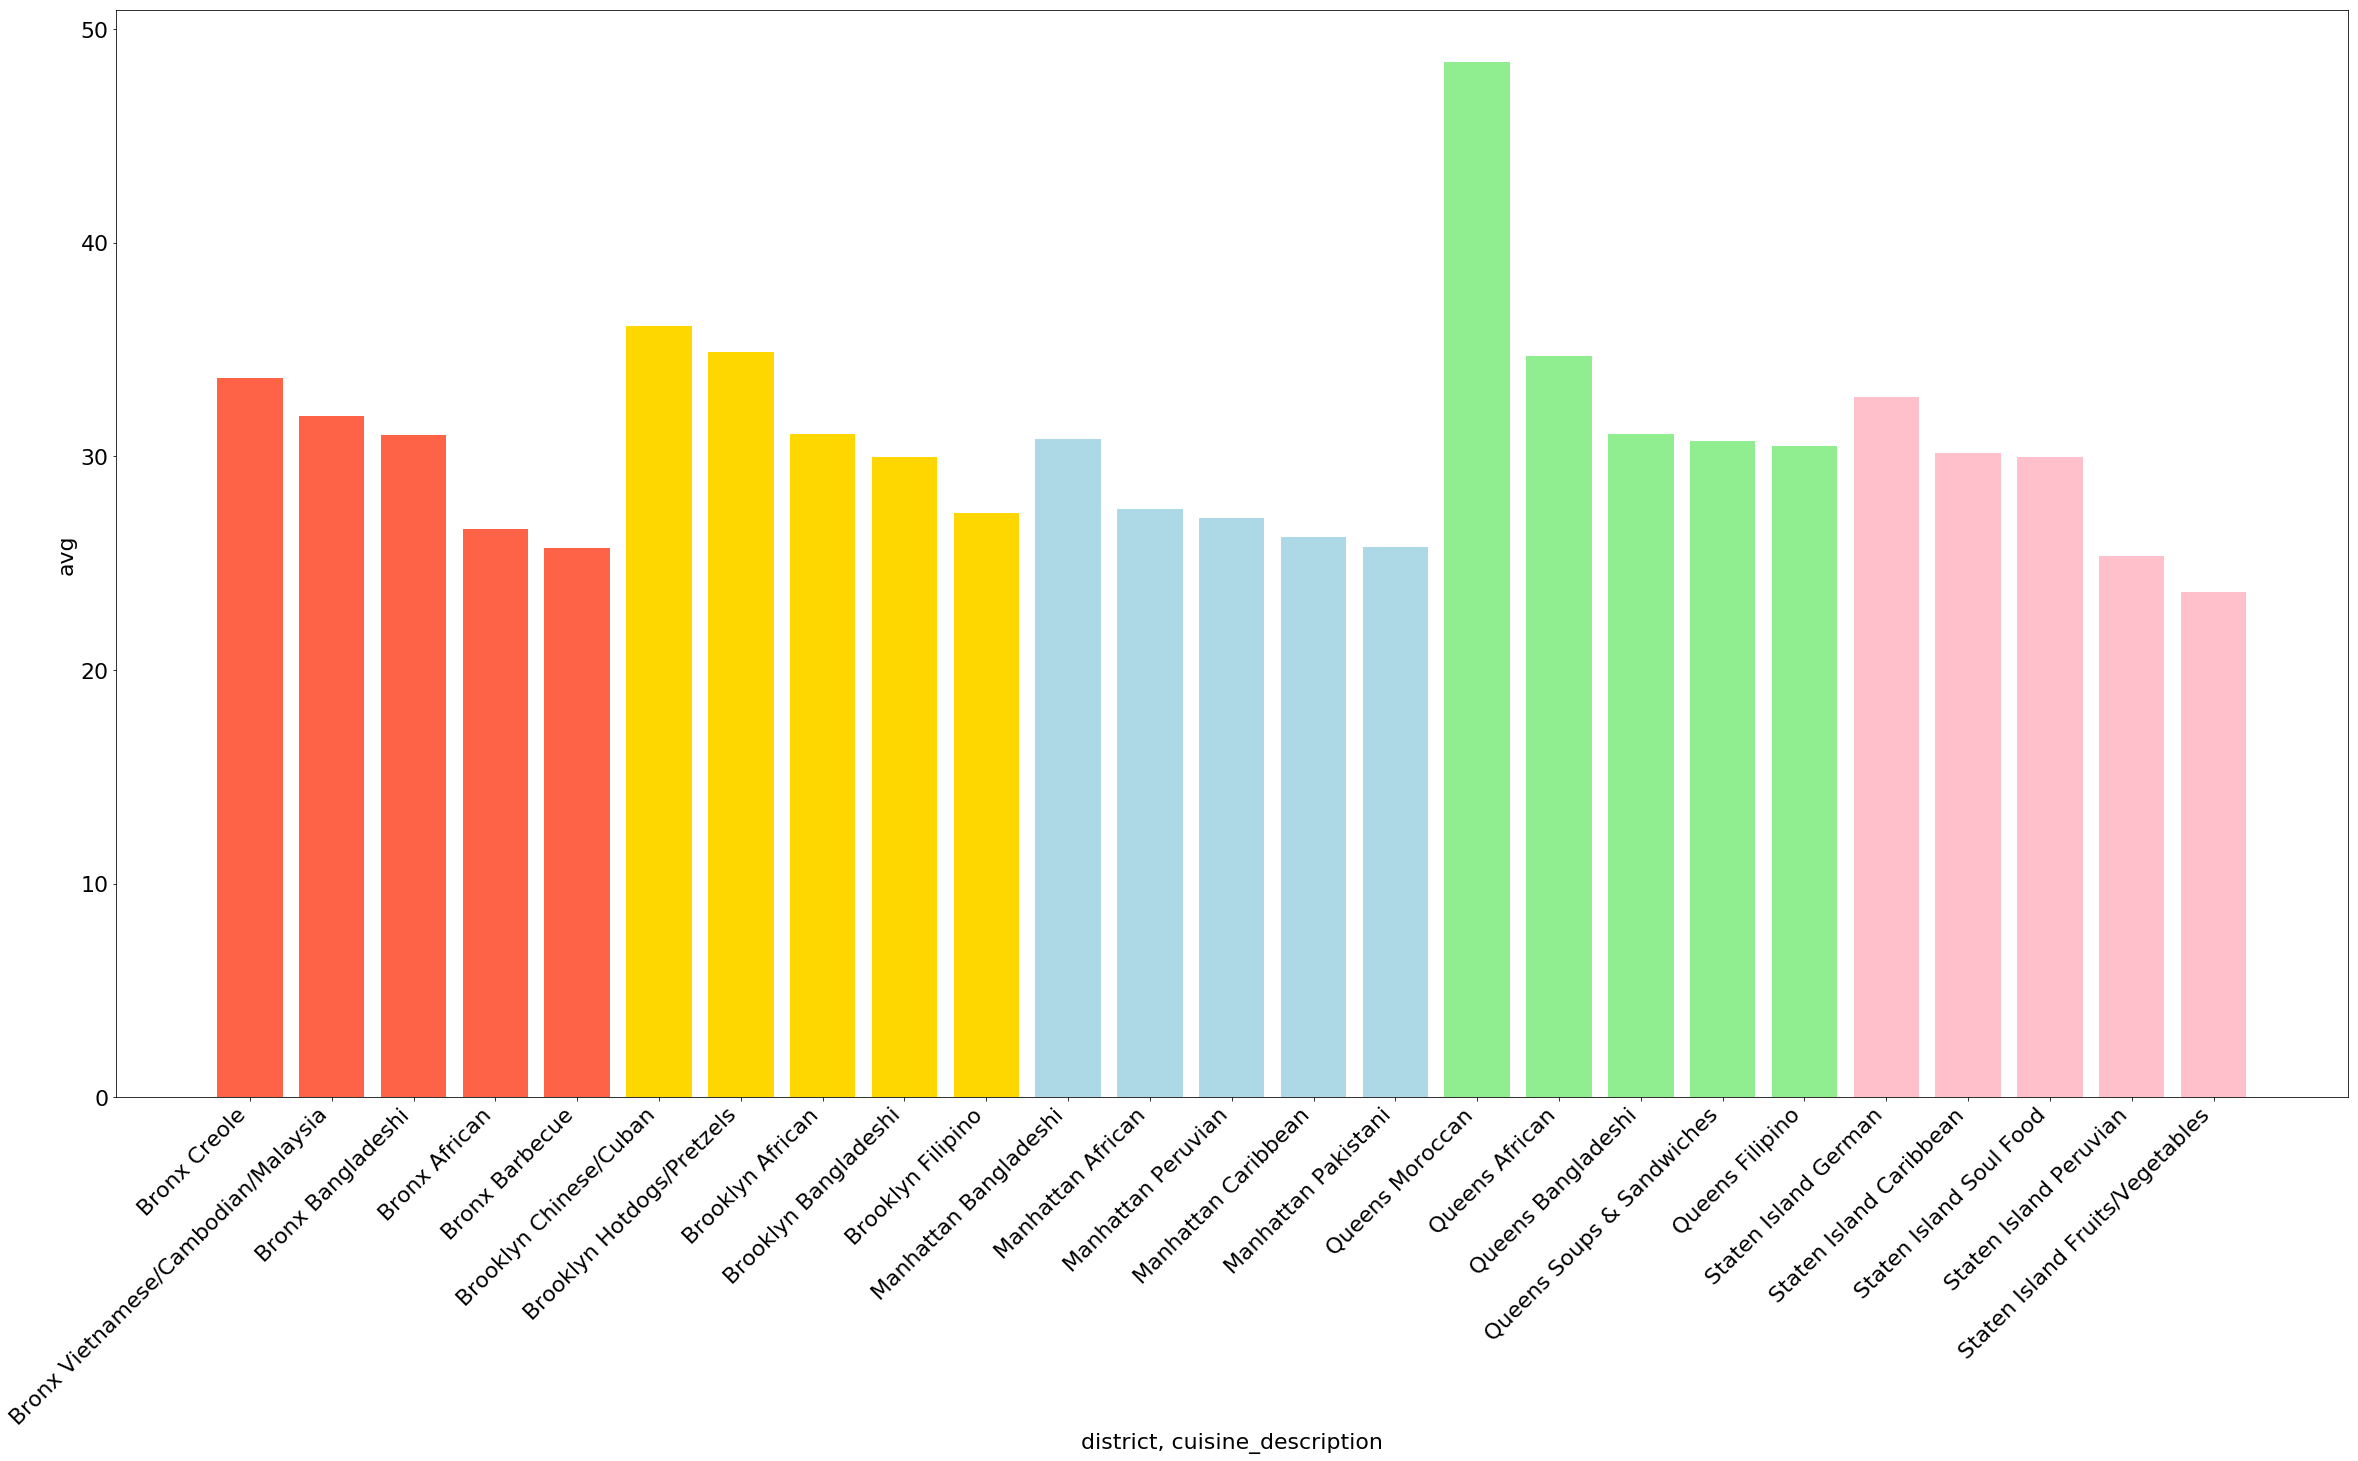

In [78]:
plt.figure (figsize=(40,20))
plt.rcParams.update({'font.size': 22})
plt.xticks(rotation=45, ha='right')
_.bar(color=['tomato','tomato','tomato','tomato','tomato',
              'gold','gold','gold','gold','gold',
              'lightblue','lightblue','lightblue','lightblue','lightblue',
            'lightgreen','lightgreen','lightgreen','lightgreen','lightgreen',
             'pink','pink','pink','pink','pink'])

## Question2

## Find top 5 cuisine in nyc and their top 5 violations.

In [58]:
%%sql
select count(distinct information_key),cuisine_description
from nyc_inspect
join cuisine
on cuisine.key = nyc_inspect.cuisine_key
group by cuisine_description
order by count desc
limit 5;

 * postgresql://student@/group17_final
5 rows affected.


count,cuisine_description
5743,American
2386,Chinese
1853,Other
1806,Café/Coffee/Tea
1201,Pizza


### we can see the top 5 cuisines are as above.

In [60]:
%%sql
(select count(information_key) as count, VIOLATION_CODE,cuisine_description
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join CUISINE
on nyc_inspect.CUISINE_KEY = CUISINE.key
group by VIOLATION_CODE,CUISINE_DESCRIPTION
having cuisine_description = 'American'
order by count desc
limit 5)
union
(select count(information_key) as count, VIOLATION_CODE,cuisine_description
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join CUISINE
on nyc_inspect.CUISINE_KEY = CUISINE.key
group by VIOLATION_CODE,CUISINE_DESCRIPTION
having cuisine_description = 'Chinese'
order by count desc
limit 5)
union
(select count(information_key) as count, VIOLATION_CODE,cuisine_description
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join CUISINE
on nyc_inspect.CUISINE_KEY = CUISINE.key
group by VIOLATION_CODE,CUISINE_DESCRIPTION
having cuisine_description = 'Other'
order by count desc
limit 5)
union
(select count(information_key) as count, VIOLATION_CODE,cuisine_description
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join CUISINE
on nyc_inspect.CUISINE_KEY = CUISINE.key
group by VIOLATION_CODE,CUISINE_DESCRIPTION
having cuisine_description = 'Café/Coffee/Tea'
order by count desc
limit 5)
union
(select count(information_key) as count, VIOLATION_CODE,cuisine_description
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join CUISINE
on nyc_inspect.CUISINE_KEY = CUISINE.key
group by VIOLATION_CODE,CUISINE_DESCRIPTION
having cuisine_description = 'Pizza'
order by count desc
limit 5)
order by cuisine_description,count desc;

 * postgresql://student@/group17_final
25 rows affected.


count,violation_code,cuisine_description
12089,10F,American
9092,08A,American
7472,06D,American
5526,10B,American
5387,04L,American
3430,10F,Café/Coffee/Tea
1919,08A,Café/Coffee/Tea
1781,06D,Café/Coffee/Tea
1229,10B,Café/Coffee/Tea
1207,06C,Café/Coffee/Tea


### We can notice that there are some common violations in these top 5 cuisines.

In [78]:
Image(url="https://raw.githubusercontent.com/Tangerinekk/DNSC6212/master/Screen%20Shot%202019-11-30%20at%2010.21.55%20PM.png")

## Question 3 

## Find each district's top 5 violations.

In [80]:
%%sql
(select count(information_key) as count, VIOLATION_CODE,district
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join location
on nyc_inspect.location_KEY = location.key
where district = 'Manhattan'
group by VIOLATION_CODE,district
order by count desc
limit 5)
union
(select count(information_key) as count, VIOLATION_CODE,district
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join location
on nyc_inspect.location_KEY = location.key
where district = 'Bronx'
group by VIOLATION_CODE,district
order by count desc
limit 5)
union
(select count(information_key) as count, VIOLATION_CODE,district
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join location
on nyc_inspect.location_KEY = location.key
where district = 'Brooklyn'
group by VIOLATION_CODE,district
order by count desc
limit 5)
union
(select count(information_key) as count, VIOLATION_CODE,district
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join location
on nyc_inspect.location_KEY = location.key
where district = 'Queens'
group by VIOLATION_CODE,district
order by count desc
limit 5)
union
(select count(information_key) as count, VIOLATION_CODE,district
from nyc_inspect
join VIOLATION 
on nyc_inspect.violation_key = violation.key
join location
on nyc_inspect.location_KEY = location.key
where district = 'Staten Island'
group by VIOLATION_CODE,district
order by count desc
limit 5)
order by district,count desc;

 * postgresql://student@/group17_final
25 rows affected.


count,violation_code,district
5761,10F,Bronx
5184,08A,Bronx
3335,04L,Bronx
2508,04N,Bronx
2474,10B,Bronx
14207,10F,Brooklyn
11326,08A,Brooklyn
7843,04L,Brooklyn
6329,06D,Brooklyn
6069,06C,Brooklyn


### We can also notice that there are some common violations in these districts.

In [82]:
Image(url="https://github.com/Tangerinekk/DNSC6212/blob/master/Screen%20Shot%202019-11-30%20at%209.40.10%20PM.png?raw=TRUE")

## Question 4

## Find each district's grade distribution

In [75]:
%%sql
select count(grade),grade,district
from nyc_inspect
join location
on location.key = nyc_inspect.location_key
group by grade,district
order by district,grade;

 * postgresql://student@/group17_final
44 rows affected.


count,grade,district
186,,0
193,A,0
25,B,0
15,C,0
1,N,0
9,P,0
3,Z,0
19559,,Bronx
16165,A,Bronx
2962,B,Bronx


In [77]:
Image(url="https://raw.githubusercontent.com/Tangerinekk/DNSC6212/master/Screen%20Shot%202019-11-29%20at%2017.03.32.png?raw=TRUE")